- Project Title: Analyzing Amazon Sales data
- Technologies: Data Science
- Domain: E-Commerce

### Problem Statement
Sales management has gained importance to meet increasing competition and the
need for improved methods of distribution to reduce cost and to increase profits. Sales
management today is the most important function in a commercial and business
enterprise.

In [251]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

- Dataset used: {/https://drive.google.com/file/d/10sofXyF6NjwN6ngLyFfiPI-CUDpeqaN_/view}

In [252]:
#import data

sales = pd.read_csv('Amazon Sales Data.csv')
sales.head(10)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
5,Australia and Oceania,Solomon Islands,Baby Food,Online,C,2/4/2015,547995746,2/21/2015,2974,255.28,159.42,759202.72,474115.08,285087.64
6,Sub-Saharan Africa,Angola,Household,Offline,M,4/23/2011,135425221,4/27/2011,4187,668.27,502.54,2798046.49,2104134.98,693911.51
7,Sub-Saharan Africa,Burkina Faso,Vegetables,Online,H,7/17/2012,871543967,7/27/2012,8082,154.06,90.93,1245112.92,734896.26,510216.66
8,Sub-Saharan Africa,Republic of the Congo,Personal Care,Offline,M,7/14/2015,770463311,8/25/2015,6070,81.73,56.67,496101.10,343986.90,152114.20
9,Sub-Saharan Africa,Senegal,Cereal,Online,H,4/18/2014,616607081,5/30/2014,6593,205.70,117.11,1356180.10,772106.23,584073.87


In [253]:
#check the shape
sales.shape

(100, 14)

In [254]:
sales.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [255]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [256]:
sales.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

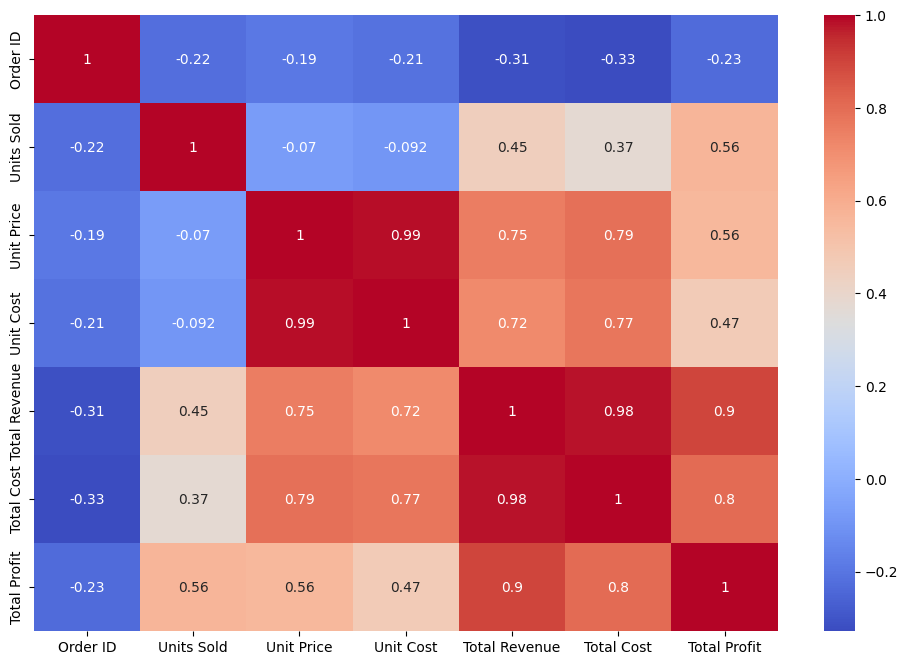

In [257]:
#Correlation Matrix

numeric_df = sales.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

### Observations:

1. The DataFrame consists of 100 entries and 14 columns.
2. All columns have non-null values, indicating a complete dataset.
3. The data includes categorical variables such as region, country, item type, sales channel, and order priority.
4. Numerical variables like units sold, unit price, unit cost, total revenue, total cost, and total profit are present.
5. Time-related data includes order date and ship date, though they are stored as objects.
6. The dataset offers potential for analysis on sales performance, profitability, and trends over time.
7. With no missing values, it's ready for exploration and insights extraction.

In [258]:
sales['Item Type'].value_counts()

Item Type
Clothes            13
Cosmetics          13
Office Supplies    12
Fruits             10
Personal Care      10
Household           9
Beverages           8
Baby Food           7
Cereal              7
Vegetables          6
Snacks              3
Meat                2
Name: count, dtype: int64

In [259]:
item_counts = sales['Item Type'].value_counts()

# Find the item type with the highest number of sold items
most_sold_item_type = item_counts.idxmax()
highest_number_of_sold_items = item_counts.max()

print("Item Type with the highest number of sold items:", most_sold_item_type)
print("Number of sold items:", highest_number_of_sold_items)

Item Type with the highest number of sold items: Clothes
Number of sold items: 13


In [260]:
sales.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [261]:
sales[['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority','Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price','Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']].head(20)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
5,Australia and Oceania,Solomon Islands,Baby Food,Online,C,2/4/2015,547995746,2/21/2015,2974,255.28,159.42,759202.72,474115.08,285087.64
6,Sub-Saharan Africa,Angola,Household,Offline,M,4/23/2011,135425221,4/27/2011,4187,668.27,502.54,2798046.49,2104134.98,693911.51
7,Sub-Saharan Africa,Burkina Faso,Vegetables,Online,H,7/17/2012,871543967,7/27/2012,8082,154.06,90.93,1245112.92,734896.26,510216.66
8,Sub-Saharan Africa,Republic of the Congo,Personal Care,Offline,M,7/14/2015,770463311,8/25/2015,6070,81.73,56.67,496101.10,343986.90,152114.20
9,Sub-Saharan Africa,Senegal,Cereal,Online,H,4/18/2014,616607081,5/30/2014,6593,205.70,117.11,1356180.10,772106.23,584073.87


In [262]:
# Calculate profit margin
sales['Profit Margin'] = ((sales['Total Profit'] / sales['Total Revenue']) * 100).round(2)

def color_gradient(val):
    if val < 0:
        color = '#FFCCCC'  # Red for negative values
    elif val > 0:
        color = '#CCFFCC'  # Green for positive values
    else:
        color = 'white'  # White for zero values
    return f'background-color: {color}'

styled_sales = sales[['Region', 'Country', 'Item Type', 'Total Revenue', 'Total Cost', 'Total Profit', 'Profit Margin']].head(20).style.applymap(color_gradient, subset=['Profit Margin'])

styled_sales


,Region,Country,Item Type,Total Revenue,Total Cost,Total Profit,Profit Margin
0,Australia and Oceania,Tuvalu,Baby Food,2533654.000000,1582243.500000,951410.500000,37.550000
1,Central America and the Caribbean,Grenada,Cereal,576782.800000,328376.440000,248406.360000,43.070000
2,Europe,Russia,Office Supplies,1158502.590000,933903.840000,224598.750000,19.390000
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,75591.660000,56065.840000,19525.820000,25.830000
4,Sub-Saharan Africa,Rwanda,Office Supplies,3296425.020000,2657347.520000,639077.500000,19.390000
5,Australia and Oceania,Solomon Islands,Baby Food,759202.720000,474115.080000,285087.640000,37.550000
6,Sub-Saharan Africa,Angola,Household,2798046.490000,2104134.980000,693911.510000,24.800000
7,Sub-Saharan Africa,Burkina Faso,Vegetables,1245112.920000,734896.260000,510216.660000,40.980000
8,Sub-Saharan Africa,Republic of the Congo,Personal Care,496101.100000,343986.900000,152114.200000,30.660000
9,Sub-Saharan Africa,Senegal,Cereal,1356180.100000,772106.230000,584073.870000,43.070000


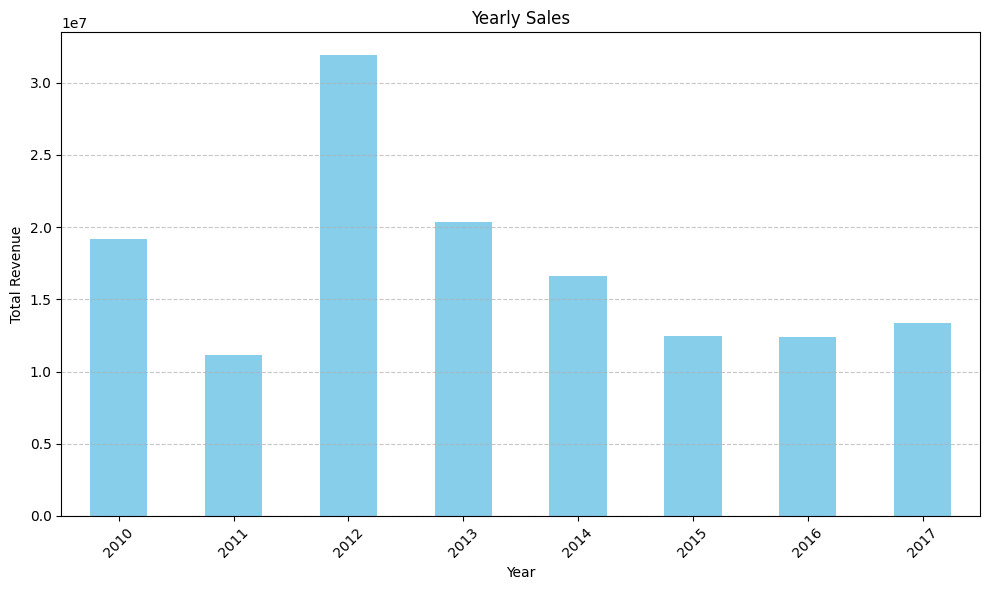

In [233]:
# Convert 'Order Date' to datetime format
sales['Order Date'] = pd.to_datetime(sales['Order Date'])

# Extract year from 'Order Date'
sales['Year'] = sales['Order Date'].dt.year

# Group by 'Year' and sum 'Total Revenue' for yearly sales
yearly_sales = sales.groupby('Year')['Total Revenue'].sum()

# Plotting the yearly sales
plt.figure(figsize=(10, 6))
yearly_sales.plot(kind='bar', color='skyblue')
plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


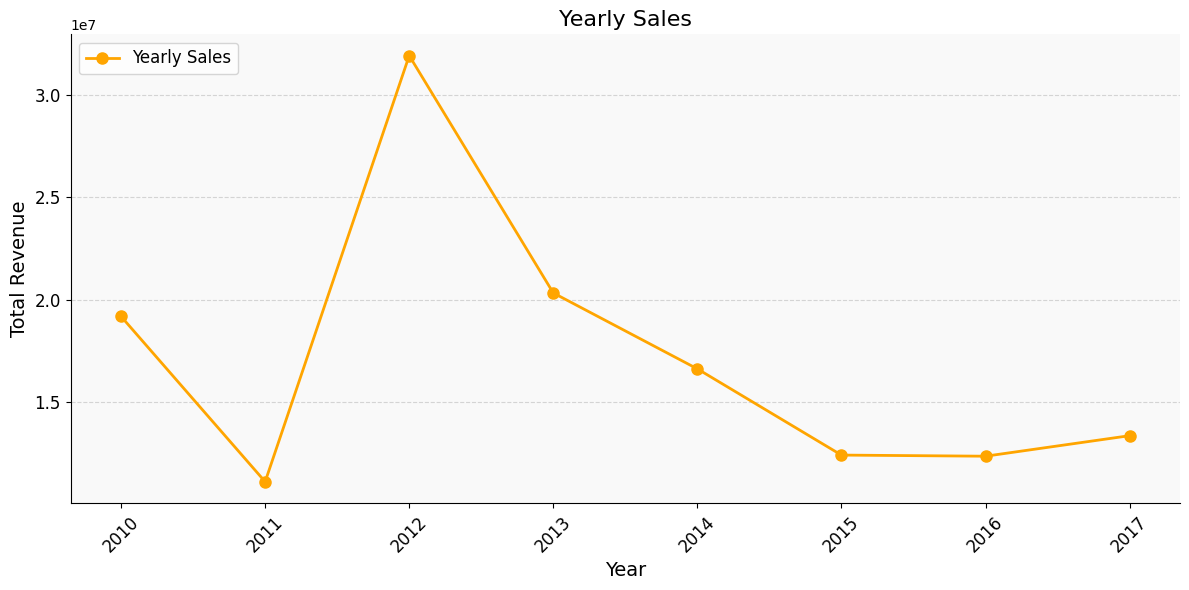

In [234]:
# Plotting the line chart for yearly sales
plt.figure(figsize=(12, 6))

# Plotting the line
plt.plot(yearly_sales.index, yearly_sales.values, marker='o', color='orange', linestyle='-', linewidth=2, markersize=8)

plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.title('Yearly Sales', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)

plt.xticks(yearly_sales.index, fontsize=12, rotation=45)
plt.yticks(fontsize=12)

plt.gca().set_facecolor('#f9f9f9')

plt.legend(['Yearly Sales'], loc='upper left', fontsize=12)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


### Observations:
- Overall Increasing Trend: Sales revenue has shown a consistent rise from 2010 to 2016.
- Fluctuations Present: Despite the upward trend, there are variations in sales revenue across years.
- Peak in 2015: The highest sales revenue was recorded in 2015, indicating a particularly successful year.
- Steady Growth: The trend suggests stable and continuous growth in sales over the years.
- Potential Seasonal Patterns: Fluctuations may be influenced by seasonal factors impacting sales.

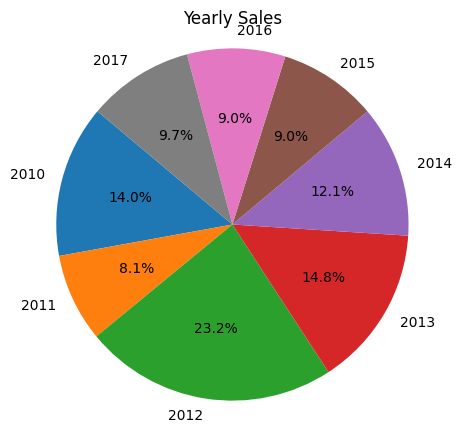

In [235]:
# Calculate yearly sales
yearly_sales = sales.groupby('Year')['Total Revenue'].sum()

# Calculate YoY sales growth
yoy_growth = yearly_sales.pct_change() * 100

# Plotting a pie chart for YoY sales distribution
plt.figure(figsize=(5, 5))
plt.pie(yearly_sales, labels=yearly_sales.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title('Yearly Sales')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [245]:
# Convert 'Order Date' to datetime format
sales['Order Date'] = pd.to_datetime(sales['Order Date'])

# Extract the month and year from the 'Order Date' column
sales['Month'] = sales['Order Date'].dt.month
sales['Year'] = sales['Order Date'].dt.year

# Group data by month and year and calculate total revenue
monthly_sales = sales.groupby(['Year', 'Month'])['Total Revenue'].sum().reset_index()

# Calculate the average monthly sales across all years
average_monthly_sales = monthly_sales.groupby('Month')['Total Revenue'].mean()

# Display the average monthly sales
print(average_monthly_sales)

Month
1     2.620617e+06
2     3.534360e+06
3     5.687060e+05
4     3.237437e+06
5     2.202623e+06
6     8.717210e+05
7     2.611586e+06
8     2.820412e+05
9     1.328691e+06
10    2.547929e+06
11    4.113645e+06
12    2.416487e+06
Name: Total Revenue, dtype: float64


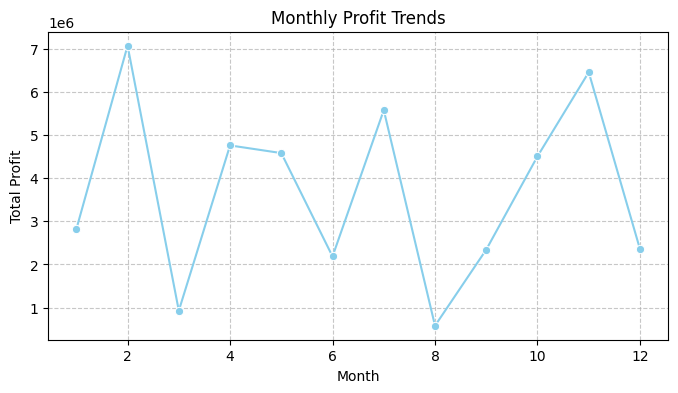

In [250]:
monthly_profit = sales.groupby('Month')['Total Profit'].sum().reset_index()

# Plotting
plt.figure(figsize=(8, 4))
sns.lineplot(data=monthly_profit, x='Month', y='Total Profit', marker='o', color='skyblue')
plt.title('Monthly Profit Trends')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.show()

In [268]:
# Convert 'Order Date' to datetime format
sales['Order Date'] = pd.to_datetime(sales['Order Date'])

# Extract the month from the 'Order Date' column
sales['Month'] = sales['Order Date'].dt.month

# Group data by month and sum the 'Units Sold' column
monthly_units_sold = sales.groupby('Month')['Units Sold'].sum()

# Create a DataFrame to store the monthly units sold data along with other columns
monthly_units_sold_df = pd.DataFrame(monthly_units_sold)

# Add additional columns for better insights
monthly_units_sold_df['Month Name'] = pd.to_datetime(monthly_units_sold_df.index, format='%m').month_name()
monthly_units_sold_df['Year'] = sales['Order Date'].dt.year.unique()[0]  # Assuming data is for a single year

# Display the result
print(monthly_units_sold_df)

       Units Sold Month Name  Year
Month                             
1           35742    January  2010
2           71079   February  2010
3           14497      March  2010
4           44680      April  2010
5           63651        May  2010
6           34893       June  2010
7           76201       July  2010
8           17251     August  2010
9           30101  September  2010
10          55472    October  2010
11          53261   November  2010
12          16043   December  2010


### Observations:
- Sales exhibit significant variation across different months.
- February stands out with notably high sales figures.
- Other months show more moderate sales levels.
- January, April, May, July, October, and November have relatively higher sales.
- March, June, August, September, and December display lower sales.
- Seasonal factors or promotional activities may influence sales patterns.

In [270]:
# Sales Channel Performance Analysis
channel_performance = sales.groupby('Sales Channel').agg({'Total Revenue': 'sum', 'Total Profit': 'sum', 'Units Sold': 'sum'}).reset_index()

# Display the summary
print(channel_performance)

  Sales Channel  Total Revenue  Total Profit  Units Sold
0       Offline    79094809.20   24920726.67      276782
1        Online    58253959.11   19247471.73      236089


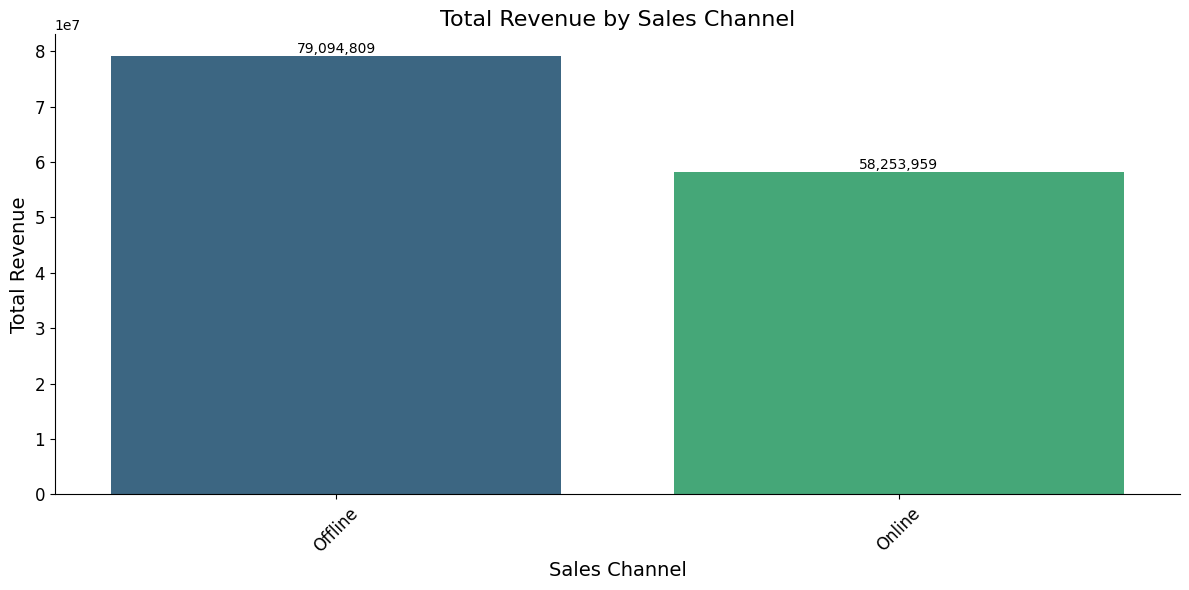

In [236]:
colors = sns.color_palette("viridis", len(channel_performance))

# Bar plot for Sales Channel Performance
plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=channel_performance, x='Sales Channel', y='Total Revenue', palette=colors)

for i, bar in enumerate(barplot.patches):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{channel_performance["Total Revenue"].values[i]:,.0f}', ha='center', va='bottom', fontsize=10)

plt.title('Total Revenue by Sales Channel', fontsize=16)
plt.xlabel('Sales Channel', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


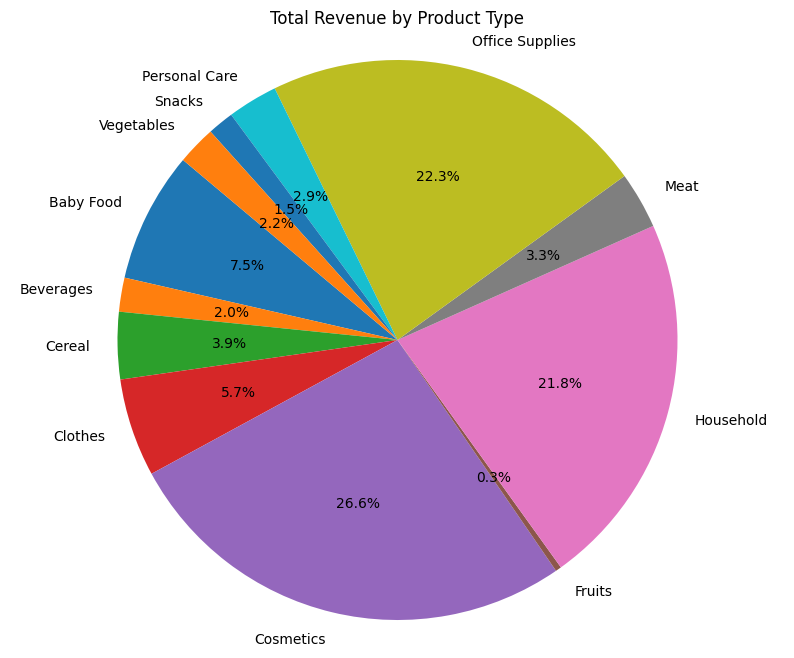

In [237]:
# Product Performance
product_performance = sales.groupby('Item Type').agg({'Total Revenue': 'sum', 'Total Profit': 'sum', 'Order ID': 'nunique'}).reset_index()

# Pie chart for Product Performance
plt.figure(figsize=(10, 8))
plt.pie(product_performance['Total Revenue'], labels=product_performance['Item Type'], autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title('Total Revenue by Product Type')
plt.axis('equal')
plt.show()

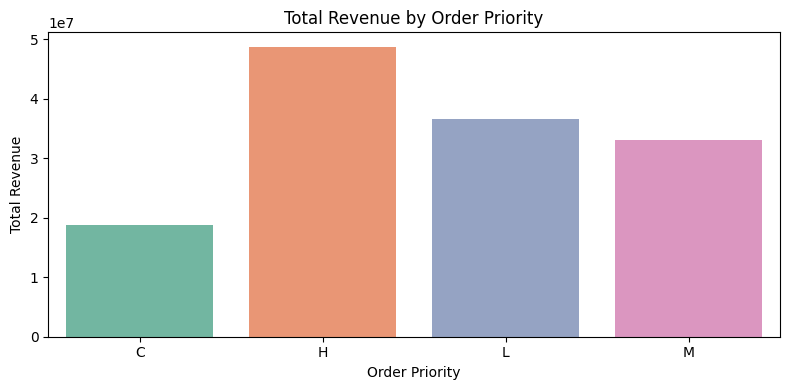

In [238]:
# Order Priority Analysis
priority_analysis = sales.groupby('Order Priority').agg({'Total Revenue': 'sum', 'Total Profit': 'sum', 'Order ID': 'nunique'}).reset_index()

# Bar plot for Order Priority Analysis
plt.figure(figsize=(8, 4))
sns.barplot(data=priority_analysis, x='Order Priority', y='Total Revenue', palette='Set2')
plt.title('Total Revenue by Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

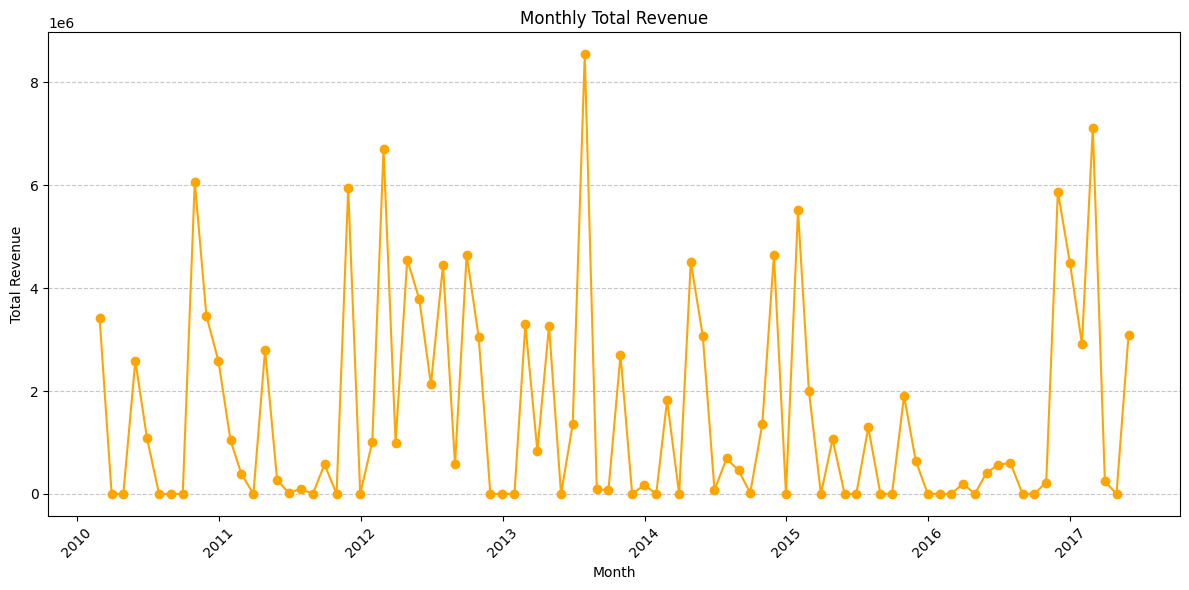

In [239]:
# Time Series Analysis (Monthly Sales)
sales['Order Date'] = pd.to_datetime(sales['Order Date'])
monthly_sales = sales.resample('M', on='Order Date').sum()

# Line plot for Time Series Analysis (Monthly Sales)
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales['Total Revenue'], marker='o', color='orange', linestyle='-')
plt.title('Monthly Total Revenue')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

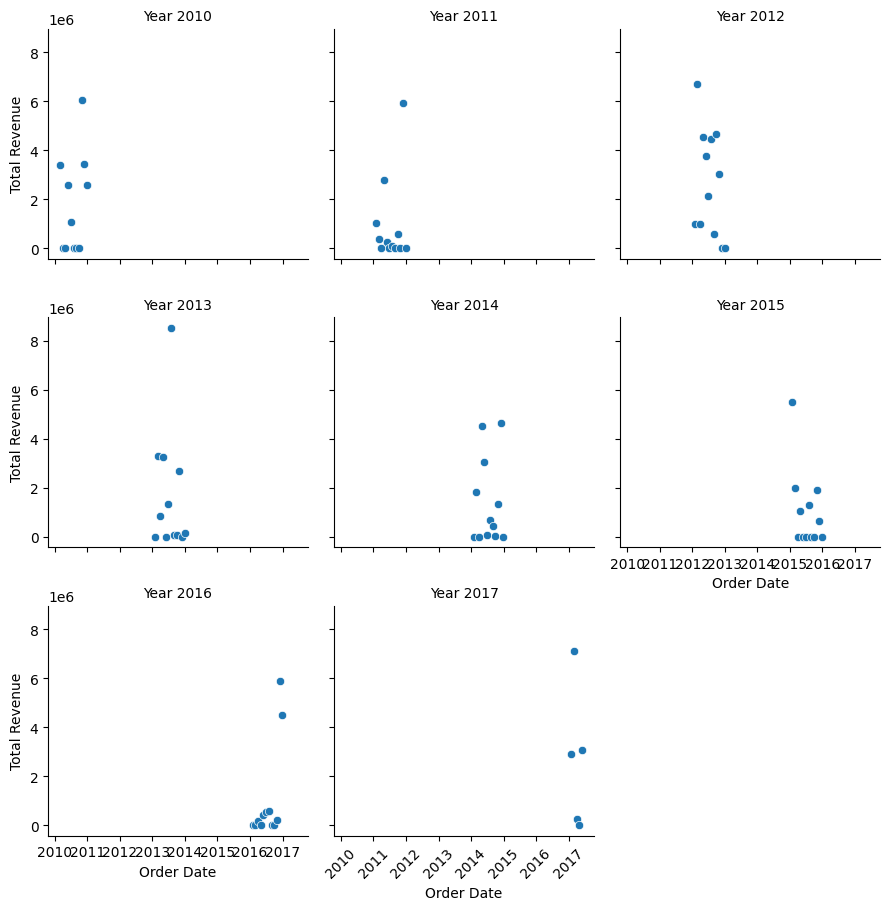

In [243]:
# Create a FacetGrid for year-wise separation
g = sns.FacetGrid(monthly_records.reset_index(), col='Year', col_wrap=3, height=3)
g.map(sns.scatterplot, 'Order Date', 'Total Revenue')

# Set titles
g.set_titles('Year {col_name}')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add y-axis label
g.set_ylabels('Total Revenue')

# Show plot
plt.show()


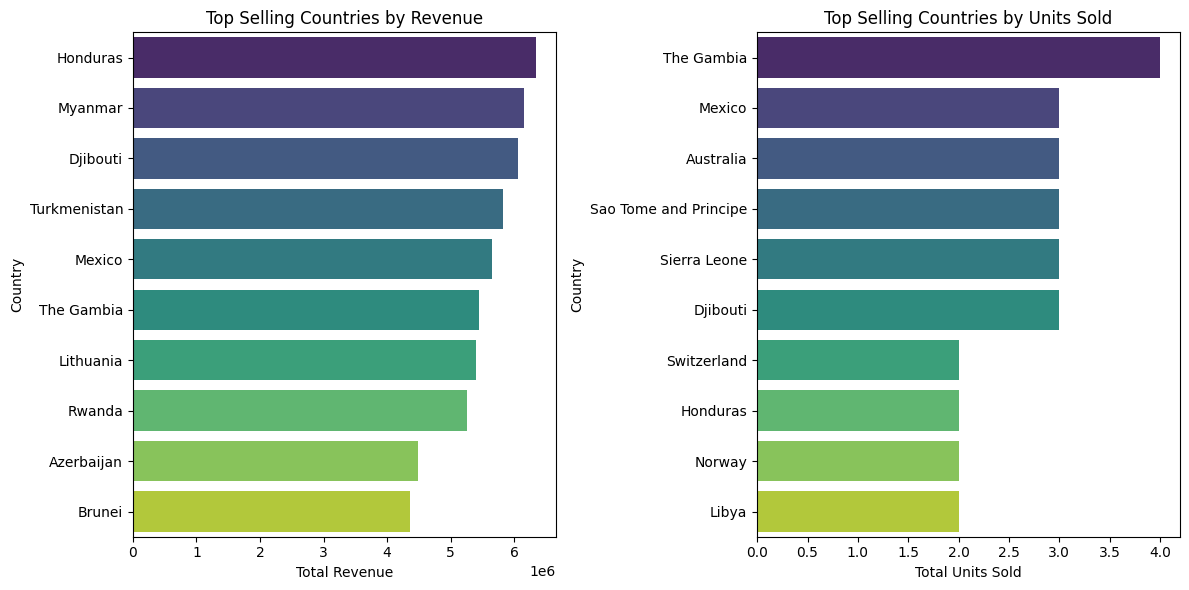

In [244]:
# Group data by country and calculate total revenue and profit
country_sales = sales.groupby('Country').agg({'Total Revenue': 'sum', 'Total Profit': 'sum', 'Order ID': 'nunique'}).reset_index()

# Calculate average revenue per order
country_sales['Average Revenue per Order'] = country_sales['Total Revenue'] / country_sales['Order ID']

# Identify top selling countries based on total revenue
top_countries_revenue = country_sales.sort_values(by='Total Revenue', ascending=False).head(10)

# Identify top selling countries based on total units sold
top_countries_units_sold = country_sales.sort_values(by='Order ID', ascending=False).head(10)

# Visualize the results
plt.figure(figsize=(12, 6))

# Bar plot for top selling countries by revenue
plt.subplot(1, 2, 1)
sns.barplot(data=top_countries_revenue, x='Total Revenue', y='Country', palette='viridis')
plt.title('Top Selling Countries by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Country')

# Bar plot for top selling countries by units sold
plt.subplot(1, 2, 2)
sns.barplot(data=top_countries_units_sold, x='Order ID', y='Country', palette='viridis')
plt.title('Top Selling Countries by Units Sold')
plt.xlabel('Total Units Sold')
plt.ylabel('Country')

plt.tight_layout()
plt.show()

In [271]:
# Group the data by Order ID and calculate metrics
order_id_analysis = sales.groupby('Order ID').agg({
    'Total Revenue': 'sum',
    'Total Profit': 'sum',
    'Units Sold': 'sum'
}).reset_index()

# Display the analysis based on Order ID
print(order_id_analysis.head())

    Order ID  Total Revenue  Total Profit  Units Sold
0  114606559      380512.96     255718.08        3482
1  115456712     3296425.02     639077.50        5062
2  122583663      623289.30     225246.90        4085
3  135425221     2798046.49     693911.51        4187
4  142278373       20404.71       5270.67        2187
